***I.) Loading the dataset***

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\ACM\S2 Recruitment\TASK-02\fashion-mnist_train.csv")

***I.) Pre-processing the dataset***

In [3]:
# Splitting the data into labels and pixel values
X=data.drop('label',axis=1) # Pixel values
y=data['label'] # Labels

In [4]:
# Normalising the pixel values
X=X/255.0

In [5]:
# Resizing the images to a fixed size
X = X.values.reshape(-1, 28, 28, 1) # This changes the size of the image to 28x28 and 1 channel (grayscale)

In [6]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

***II.) Model Selection and Training***

**1.) Logistic Regression**

In [7]:
from sklearn.linear_model import LogisticRegression

# Fitting the model
log_reg=LogisticRegression()

In [8]:
# Reshaping X_train to 2D array
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Training the model
log_reg.fit(X_train_reshaped, y_train)

c:\Users\Devab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**2.) SVM**

In [9]:
from sklearn import svm

# fitting the model
svm_model = svm.SVC(kernel='linear')

In [10]:
# Training the model
svm_model.fit(X_train_reshaped, y_train)

SVC(kernel='linear')

**3.) Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the model
dec_tree=DecisionTreeClassifier()

In [12]:
# Training the model 
dec_tree.fit(X_train_reshaped, y_train)

DecisionTreeClassifier()

***Model Evaluation***

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

**1.) Logistic Regression**

In [14]:
a_1=accuracy_score(y_test,log_reg.predict(X_test.reshape(X_test.shape[0],-1)))
print("The accuaracy score is: ",a_1)
p_1=precision_score(y_test,log_reg.predict(X_test.reshape(X_test.shape[0],-1)),average='weighted')
print("The precision score is: ",p_1)
r_1=recall_score(y_test,log_reg.predict(X_test.reshape(X_test.shape[0],-1)),average='weighted')
print("The recall score is: ",r_1)
f_1=f1_score(y_test,log_reg.predict(X_test.reshape(X_test.shape[0],-1)),average='weighted')
print("The f1 score is: ",f_1)

The accuaracy score is:  0.8553333333333333
The precision score is:  0.8540310916176509
The recall score is:  0.8553333333333333
The f1 score is:  0.8542033556806395


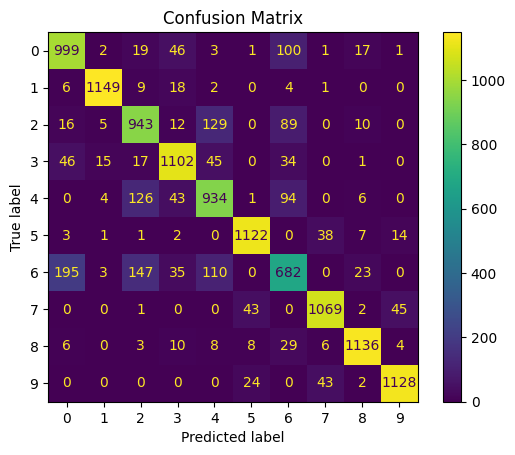

In [15]:
# Printing the confusion matrix
cm = confusion_matrix(y_test, log_reg.predict(X_test.reshape(X_test.shape[0],-1)))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Seperating the correct and incorrect predictions
y_pred = log_reg.predict(X_test.reshape(X_test.shape[0], -1))
correct = np.where(y_test == y_pred)[0]
incorrect = np.where(y_test != y_pred)[0]

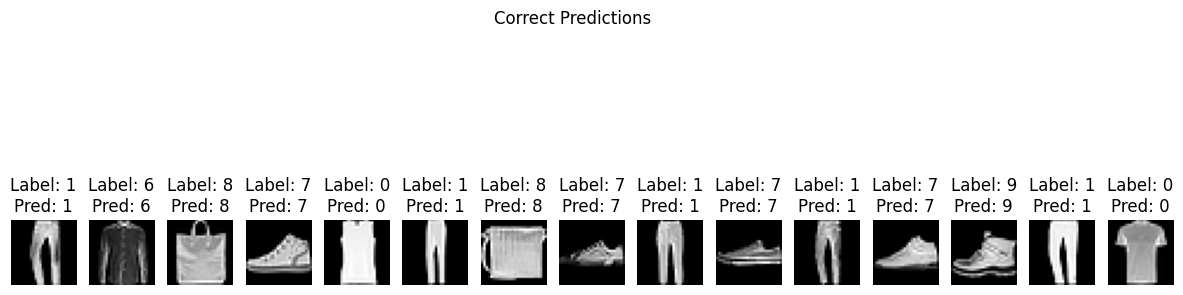

In [17]:
# Visualising the correct predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(correct[:15]):
    plt.subplot(1, 15, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()

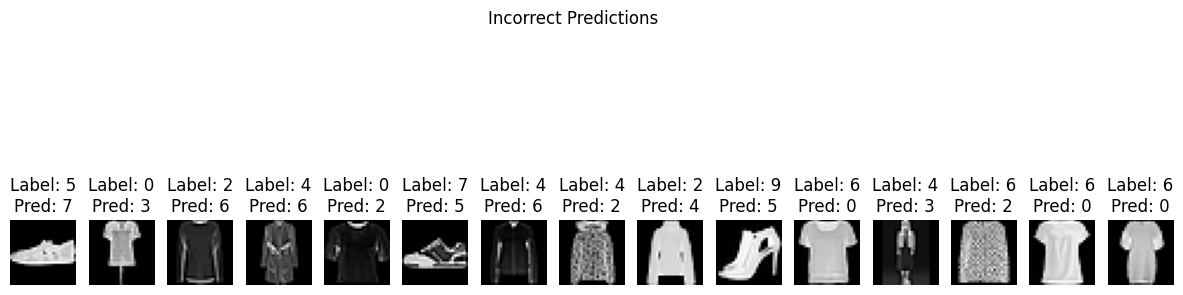

In [18]:
# Visualising the incorrect predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(incorrect[:15]):
    plt.subplot(1, 15, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()

**2.) SVM**

In [19]:
y2_pred=svm_model.predict(X_test.reshape(X_test.shape[0],-1))
a_2=accuracy_score(y_test,y2_pred)
print("The accuaracy score is: ",a_2)
p_2=precision_score(y_test,y2_pred,average='weighted')
print("The precision score is: ",p_2)
r_2=recall_score(y_test,y2_pred,average='weighted')
print("The recall score is: ",r_2)
f_2=f1_score(y_test,y2_pred,average='weighted')
print("The f1 score is: ",f_2)

The accuaracy score is:  0.8519166666666667
The precision score is:  0.8515772089255349
The recall score is:  0.8519166666666667
The f1 score is:  0.8511111365577443


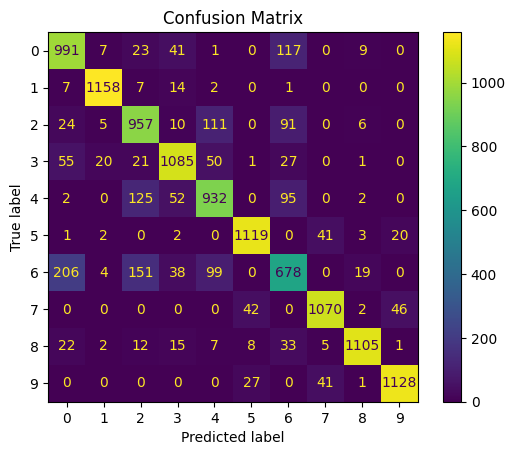

In [20]:
# Printing the confusion matrix
cm = confusion_matrix(y_test,y2_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

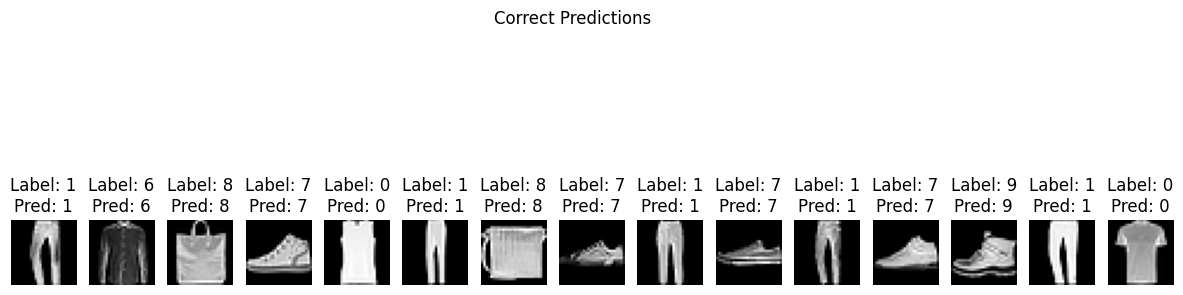

In [21]:
# Visualising the correct predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(correct[:15]):
    plt.subplot(1, 15, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test.iloc[idx]}\nPred: {y2_pred[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()

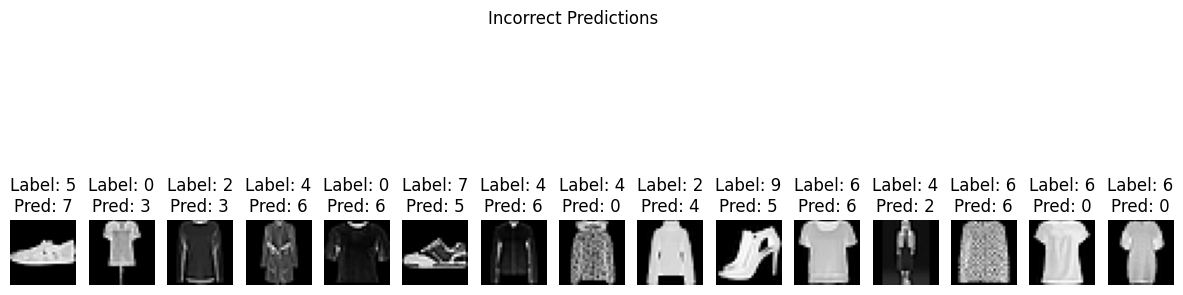

In [22]:
# Visualising the incorrect predictions 
plt.figure(figsize=(15, 5))
for i, idx in enumerate(incorrect[:15]):
    plt.subplot(1, 15, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test.iloc[idx]}\nPred: {y2_pred[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()

**3.) Decision Tree**

In [23]:
y3_pred=dec_tree.predict(X_test.reshape(X_test.shape[0],-1))
a_3=accuracy_score(y_test,y2_pred)
print("The accuaracy score is: ",a_3)
p_3=precision_score(y_test,y3_pred,average='weighted')
print("The precision score is: ",p_3)
r_3=recall_score(y_test,y3_pred,average='weighted')
print("The recall score is: ",r_3)
f_3=f1_score(y_test,y3_pred,average='weighted')
print("The f1 score is: ",f_3)

The accuaracy score is:  0.8519166666666667
The precision score is:  0.7966185374953972
The recall score is:  0.7968333333333333
The f1 score is:  0.7966258350257399


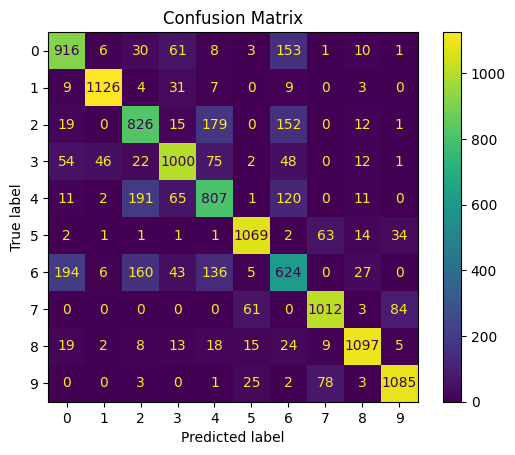

In [24]:
# Printing the confusion matrix
cm = confusion_matrix(y_test,y3_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

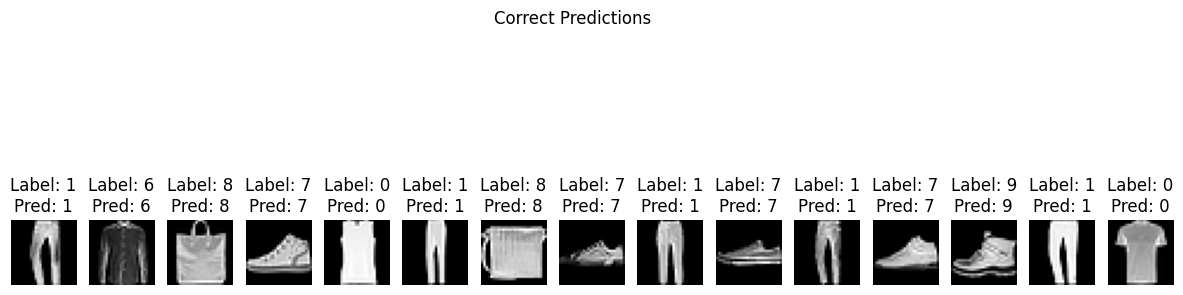

In [25]:
# Visualising the correct predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(correct[:15]):
    plt.subplot(1, 15, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test.iloc[idx]}\nPred: {y2_pred[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()

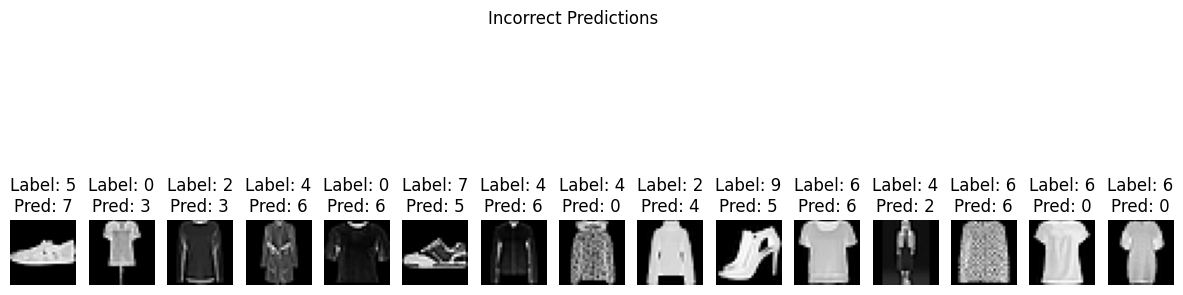

In [26]:
# Visualising the incorrect predictions

plt.figure(figsize=(15, 5))
for i, idx in enumerate(incorrect[:15]):
    plt.subplot(1, 15, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test.iloc[idx]}\nPred: {y2_pred[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()

***III.) Model evaluation***

<Figure size 1000x600 with 0 Axes>

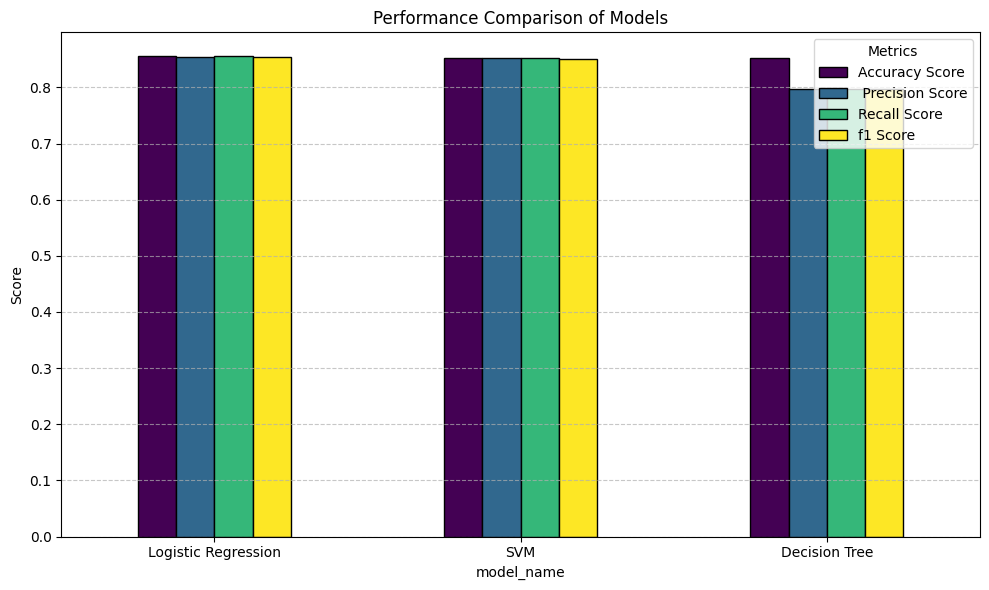

In [27]:
# Visualising the performance of all 3 models
performance=[]
model_1={"model_name":"Logistic Regression","Accuracy Score": a_1," Precision Score": p_1,"Recall Score":r_1,"f1 Score":f_1} 
model_2={"model_name":"SVM","Accuracy Score": a_2," Precision Score": p_2,"Recall Score":r_2,"f1 Score":f_2}
model_3={"model_name":"Decision Tree","Accuracy Score": a_3," Precision Score": p_3,"Recall Score":r_3,"f1 Score":f_3}
performance.append(model_1)
performance.append(model_2)
performance.append(model_3)

perf=pd.DataFrame(performance)

plt.figure(figsize=(10, 6))
perf.set_index("model_name").plot(kind="bar", figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
